# Bifunctional Labeling

In [1]:
import numpy as np
import chilife as xl

In [2]:
# Fetch maltodextrin binding protein structure from the PDB
protein = xl.fetch('2qmt')

# Create spin labels using the off-rotamer sampling method
SL1 = xl.dSpinLabel('DCN', (6, 8), protein)
SL2 = xl.dSpinLabel('DCN', (28,32), protein)

# Predict distance distributions over an experimental axis
r, Pexp = np.loadtxt('Exp_Data.txt').T
Pexp /= np.trapz(Pexp, r)
P = xl.distance_distribution(SL1, SL2, r=r)

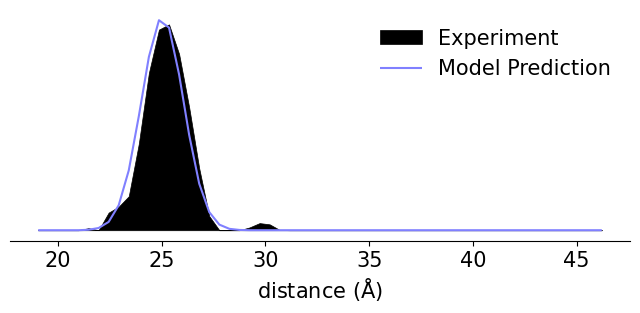

In [3]:
import matplotlib.pyplot as plt
plt.style.use('chiLife')
plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(8, 3))

ax.fill_between(r, Pexp, label='Experiment', color='k')

ax.plot(r, P, label='Model Prediction', color='C0')


ax.set_yticks([])
ax.set_xlabel(r'distance ($\rm\AA$)')
ax.legend(frameon=False)
for spine in ['left', 'top', 'right']:
    ax.spines[spine].set_visible(False)

plt.show()
